# As this project is relating to insurance policies, this analysis is aimed at pricing analysis and a demand model.


Below are the following steps for this project

1.  Import all relevant libraries for this analysis
2.  Read the data file using pandas 
3.  Carry out a Exploratory Data Analysis (EDA) on dataset to study patterns and trends 
4.  Data visualization
5.  Identify relevant and irrelevant columns
6.  Explore relationship between features with correlation analysis 
7.  Determine flat and test price and calculate price elasticity
8.  Split data into different training and testing data 
9. Build and evaluate model
10. identify other features that may have an impact on the model
11. chek the impact of a 10% flat price increase in the demand
    

# Import relevant Libraries for data analysis and modeling

In [153]:
#import our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [154]:
# Read train_ test csv file
data = pd.read_csv("train_test.csv")

# Exploratory Data Analysis (EDA)

In [155]:
#view the first 5 items 
print("The first 5 items in data")
data.head()

The first 5 items in data


,Claims_Amount,Claims_Count,Purchase_Date,Purchase_Price,Sale_Flag,Period_of_Cover,Premium,Plan_Flag,Age,Price_Diff,Cover_Start_Date,Plan_Count,PriceTest,Account,Category
0,0.0,0,2021-11-06,450.00,0,12,40.56,0,18.0,0.220217,2021-11-24,0,1,0,12
1,0.0,0,2021-12-10 00:00:00,437.02,1,12,45.36,0,0.0,0.148936,2021-12-10 00:00:00,0,1,14,1
2,0.0,0,2021-11-22,279.48,0,12,36.24,0,7.0,-0.082067,2021-11-29,0,1,14,15
3,0.0,0,2021-10-20 00:00:00,400.00,0,12,56.52,0,7.0,0.165842,2021-10-27 00:00:00,0,1,14,9
4,0.0,0,2021-04-16 00:00:00,700.00,1,12,61.32,0,180.0,-0.057196,2021-10-13 00:00:00,0,1,29,20


In [156]:
#Check the data columns
print("Dataset columns")
data.columns

Dataset columns


Index(['Claims_Amount', 'Claims_Count', 'Purchase_Date', 'Purchase_Price',
       'Sale_Flag', 'Period_of_Cover', 'Premium', 'Plan_Flag', 'Age',
       'Price_Diff', 'Cover_Start_Date', 'Plan_Count', 'PriceTest', 'Account',
       'Category'],
      dtype='object')

In [157]:
#view the last 5 items in the dataset
#this shows the general overview of the first 5 items in our list
print("The last 5 list of the dataset")
data.tail()

The last 5 list of the dataset


,Claims_Amount,Claims_Count,Purchase_Date,Purchase_Price,Sale_Flag,Period_of_Cover,Premium,Plan_Flag,Age,Price_Diff,Cover_Start_Date,Plan_Count,PriceTest,Account,Category
1995,155.38,1,2021-10-29,480.29,0,12,39.48,0,0.0,0.0,2021-10-29,0,0,14,1
1996,0.00,0,2021-09-17,599.00,0,12,33.24,0,87.0,0.0,2021-12-13,0,0,0,12
1997,0.00,0,2021-11-26 00:00:00,363.83,1,12,39.48,1,0.0,0.0,2021-11-26 00:00:00,1,0,2,1
1998,0.00,0,2021-10-19,299.00,0,12,51.36,0,17.0,0.0,2021-11-05,0,0,6,18
1999,0.00,0,2021-10-08,599.99,0,12,43.32,0,0.0,0.0,2021-10-08,0,0,0,4


# A General description of the dataset

In [158]:
#Observe the mean, median, counts, standard deviation, min, max etc 


print("A General description of the dataset")
data.describe()

A General description of the dataset


,Claims_Amount,Claims_Count,Purchase_Price,Sale_Flag,Period_of_Cover,Premium,Plan_Flag,Age,Price_Diff,Plan_Count,PriceTest,Account,Category
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,64.237970,0.559500,363.760365,0.212500,12.0,45.021780,0.185000,53.879500,-0.005156,0.384500,0.500000,12.368000,11.251000
std,271.781163,2.170211,190.458154,0.409179,0.0,12.766634,0.388395,123.452863,0.120037,1.077144,0.500125,8.793761,6.998964
min,0.000000,0.000000,44.000000,0.000000,12.0,18.000000,0.000000,0.000000,-0.299169,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,260.000000,0.000000,12.0,36.000000,0.000000,1.000000,-0.017982,0.000000,0.000000,4.000000,4.000000
50%,0.000000,0.000000,300.000000,0.000000,12.0,43.320000,0.000000,7.000000,0.000000,0.000000,0.500000,14.000000,12.000000
75%,0.000000,0.000000,409.037500,0.000000,12.0,52.320000,0.000000,32.000000,0.000000,0.000000,1.000000,15.250000,18.000000
max,4496.550000,31.000000,2999.000000,1.000000,12.0,123.600000,1.000000,823.000000,0.299169,12.000000,1.000000,30.000000,21.000000


This shows a total count of 2000 rows in our dataset, the mean value for premium is approximately 45.02 and sales_flag is 0.185
The also gives the general overview of the standard deviation for each column as well as the min and the max vlaues for item etc

# Check for null values in data

In [159]:
#Observe the info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Claims_Amount     2000 non-null   float64
 1   Claims_Count      2000 non-null   int64  
 2   Purchase_Date     2000 non-null   object 
 3   Purchase_Price    2000 non-null   float64
 4   Sale_Flag         2000 non-null   int64  
 5   Period_of_Cover   2000 non-null   int64  
 6   Premium           2000 non-null   float64
 7   Plan_Flag         2000 non-null   int64  
 8   Age               2000 non-null   float64
 9   Price_Diff        2000 non-null   float64
 10  Cover_Start_Date  2000 non-null   object 
 11  Plan_Count        2000 non-null   int64  
 12  PriceTest         2000 non-null   int64  
 13  Account           2000 non-null   int64  
 14  Category          2000 non-null   int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 234.5+ KB


The info() indicated there are no null values.

The data types in our dataset includes floats, integers and objects(strings) and the value_counts of the dtype

# Format Dates in Dataset

In [160]:
# At this point, I don't think the purchase date and cover_start_date is relevant but I have formatted the dates just incase
# formatted Purchase_Date and Cover_Start_Date 

data["Purchase_Date"] = pd.to_datetime(data["Purchase_Date"])
data["Purchase_Date"] = data["Purchase_Date"].dt.date



data["Cover_Start_Date"] = pd.to_datetime(data["Cover_Start_Date"])
data["Cover_Start_Date"] = data["Cover_Start_Date"].dt.date
print("A snap look at the date formated")
data

A snap look at the date formated


,Claims_Amount,Claims_Count,Purchase_Date,Purchase_Price,Sale_Flag,Period_of_Cover,Premium,Plan_Flag,Age,Price_Diff,Cover_Start_Date,Plan_Count,PriceTest,Account,Category
0,0.00,0,2021-11-06,450.00,0,12,40.56,0,18.0,0.220217,2021-11-24,0,1,0,12
1,0.00,0,2021-12-10,437.02,1,12,45.36,0,0.0,0.148936,2021-12-10,0,1,14,1
2,0.00,0,2021-11-22,279.48,0,12,36.24,0,7.0,-0.082067,2021-11-29,0,1,14,15
3,0.00,0,2021-10-20,400.00,0,12,56.52,0,7.0,0.165842,2021-10-27,0,1,14,9
4,0.00,0,2021-04-16,700.00,1,12,61.32,0,180.0,-0.057196,2021-10-13,0,1,29,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,155.38,1,2021-10-29,480.29,0,12,39.48,0,0.0,0.000000,2021-10-29,0,0,14,1
1996,0.00,0,2021-09-17,599.00,0,12,33.24,0,87.0,0.000000,2021-12-13,0,0,0,12
1997,0.00,0,2021-11-26,363.83,1,12,39.48,1,0.0,0.000000,2021-11-26,1,0,2,1
1998,0.00,0,2021-10-19,299.00,0,12,51.36,0,17.0,0.000000,2021-11-05,0,0,6,18


# A histogram representation of the data

A histogram representation of the data


array([[<Axes: title={'center': 'Claims_Amount'}>,
        <Axes: title={'center': 'Claims_Count'}>,
        <Axes: title={'center': 'Purchase_Price'}>,
        <Axes: title={'center': 'Sale_Flag'}>],
       [<Axes: title={'center': 'Period_of_Cover'}>,
        <Axes: title={'center': 'Premium'}>,
        <Axes: title={'center': 'Plan_Flag'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Price_Diff'}>,
        <Axes: title={'center': 'Plan_Count'}>,
        <Axes: title={'center': 'PriceTest'}>,
        <Axes: title={'center': 'Account'}>],
       [<Axes: title={'center': 'Category'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

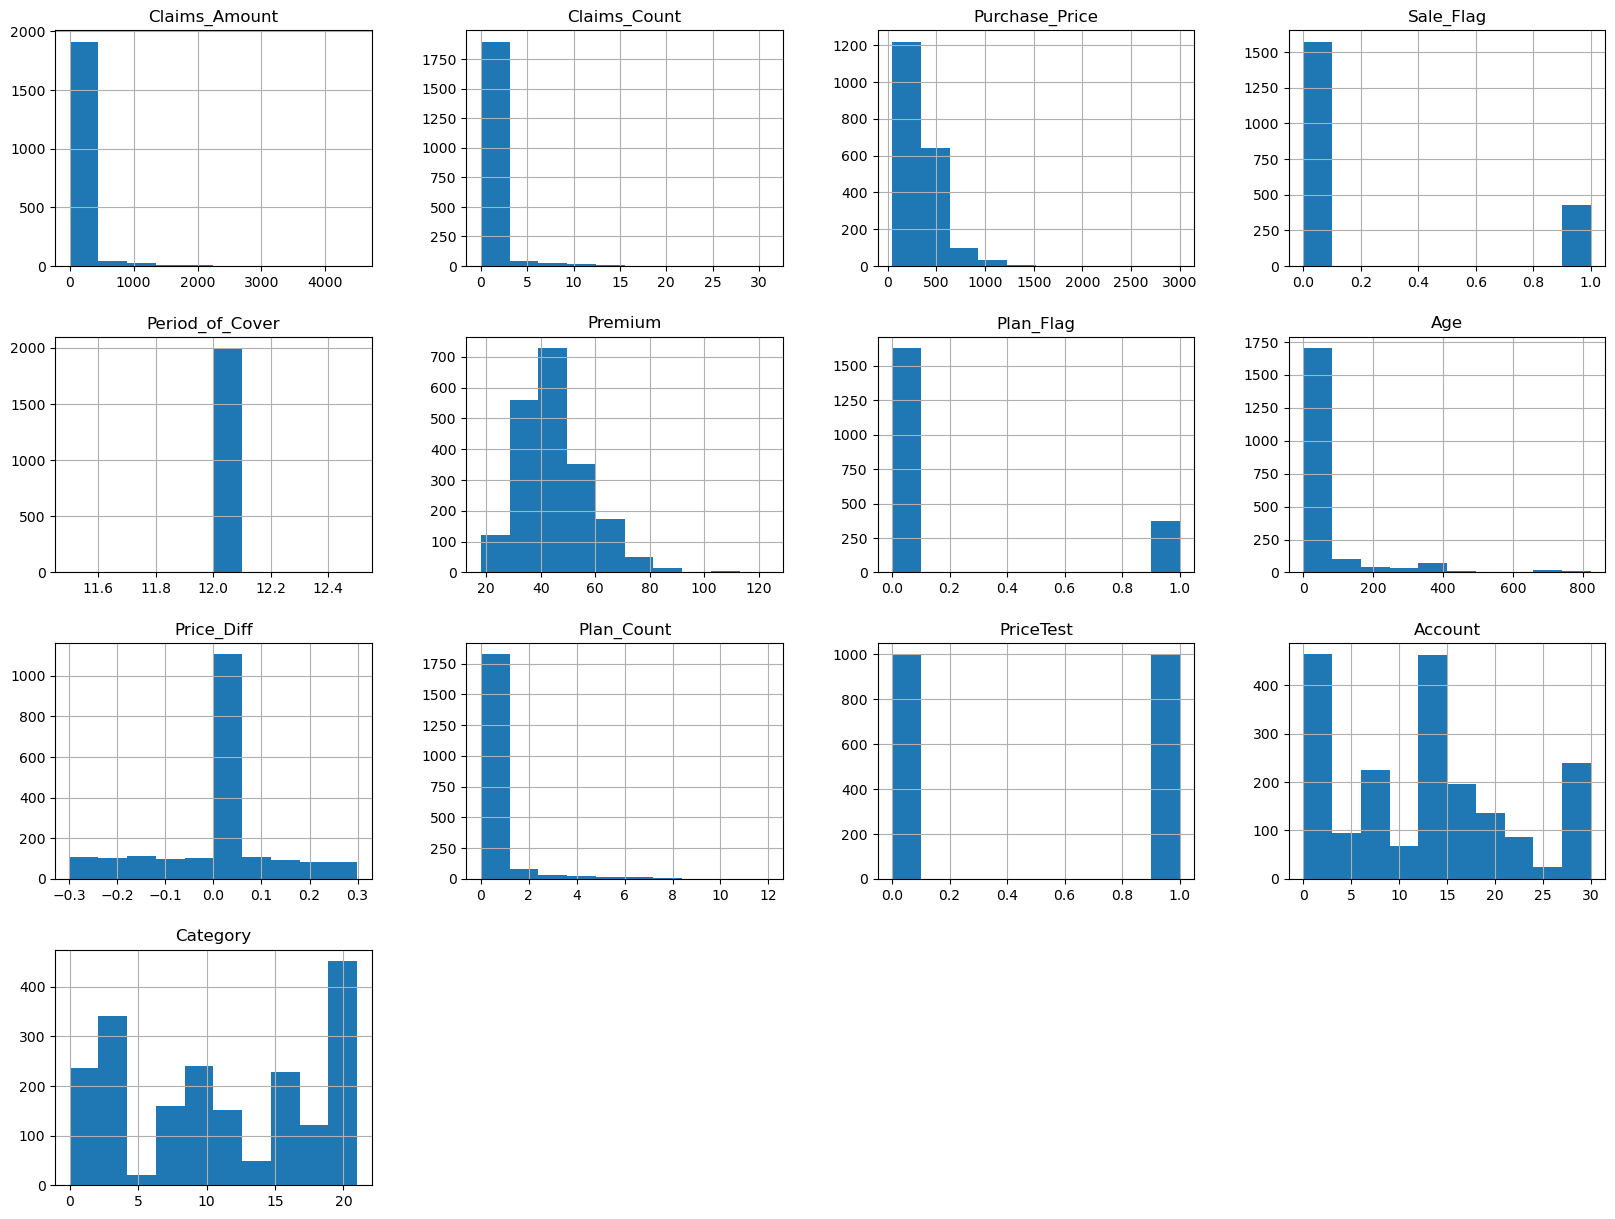

In [161]:
#general histogram t study the data further
print("A histogram representation of the data")
data.hist(figsize=(20, 15))

The above histograms shows the distribution of each column in the data 

# Drop irrelevant headings

In [162]:

data= data.drop(['Purchase_Date', 'Cover_Start_Date', 'Period_of_Cover'], axis=1)
print("Dataset without purchase_date, period_of_cover and cover_start_date")
data

Dataset without purchase_date, period_of_cover and cover_start_date


,Claims_Amount,Claims_Count,Purchase_Price,Sale_Flag,Premium,Plan_Flag,Age,Price_Diff,Plan_Count,PriceTest,Account,Category
0,0.00,0,450.00,0,40.56,0,18.0,0.220217,0,1,0,12
1,0.00,0,437.02,1,45.36,0,0.0,0.148936,0,1,14,1
2,0.00,0,279.48,0,36.24,0,7.0,-0.082067,0,1,14,15
3,0.00,0,400.00,0,56.52,0,7.0,0.165842,0,1,14,9
4,0.00,0,700.00,1,61.32,0,180.0,-0.057196,0,1,29,20
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,155.38,1,480.29,0,39.48,0,0.0,0.000000,0,0,14,1
1996,0.00,0,599.00,0,33.24,0,87.0,0.000000,0,0,0,12
1997,0.00,0,363.83,1,39.48,1,0.0,0.000000,1,0,2,1
1998,0.00,0,299.00,0,51.36,0,17.0,0.000000,0,0,6,18


Dropped period_of_cover, Purchase_Date, Cover_Start_Date as they are not required for this analysis

# CORRELATION METRIX

CORRELATION METRIX


<Axes: >

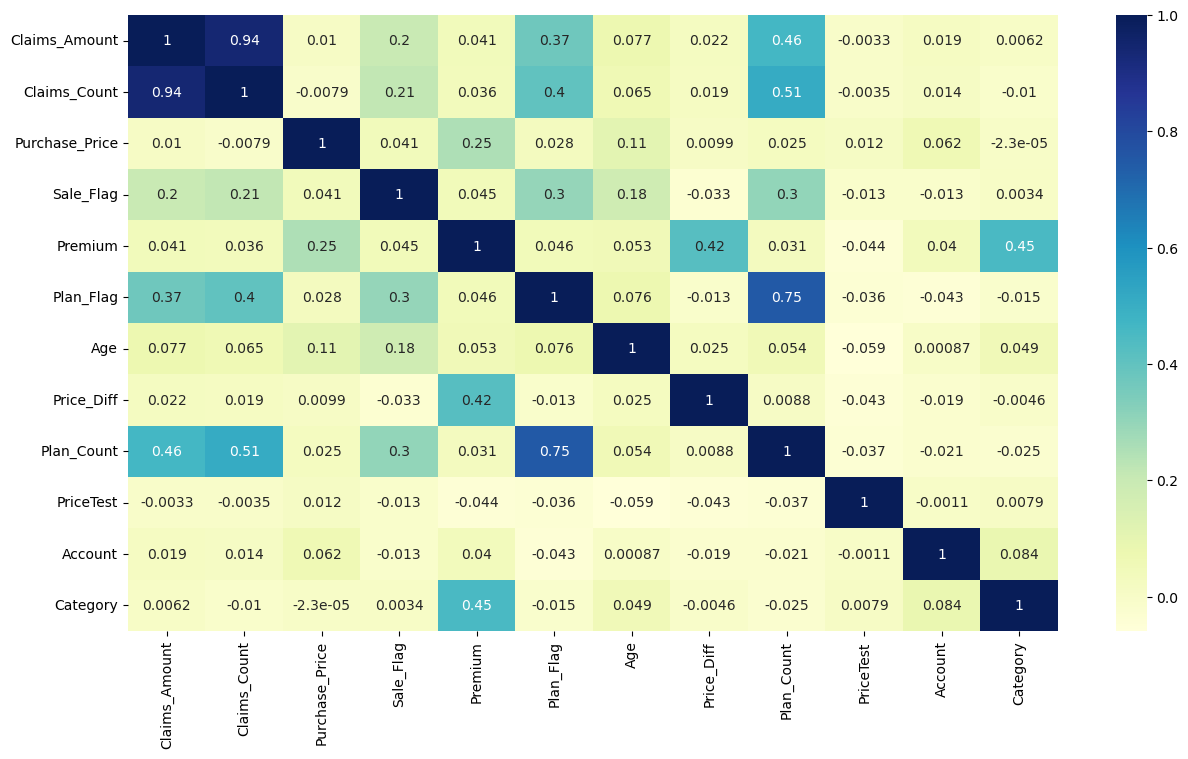

In [163]:
#This heatmap shows the correlation between each of the items in dataset
print("CORRELATION METRIX")
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

At this point, it is relevant to plot a correlation metrix to observe the relationship between our dataset

The correlation metrix shows some interesting correlation between plan_flag and plan_count of 0.75, 
claim_amount and claim_counts which makes sense as these are naturally related. 

The observation also shows a strong correlation between premium and category(0.45), there are also negative correlations such as premium and price test which is quite interesting to see

# PRICE ELASTICITY


The second major objective is to Compare the price elasticity of the two strategies in the dataset, flat and random price.

First of all, I need to identify and define flat and random price.

From my observations, PriceTest and Sales_Flag seem to represented in BINARY FORMAT where 0(not) and 1(yes) which makes it interesting to look more into. 

The PriceTest observes 0 to be a flat price and 1 to be a random price

The variable definition indicates Sale_Flag is the target 

Therefore I have decided to compare the 2 variables together and to do so,I used the unique() to identify the unique values for PriceTest as shown below

# Identify flat and random price by comparing PriceTest and Sale_Flag


Unique categories in 'PriceTest': [1 0]
0    782
1    218
Name: Sale_Flag, dtype: int64 0    793
1    207
Name: Sale_Flag, dtype: int64


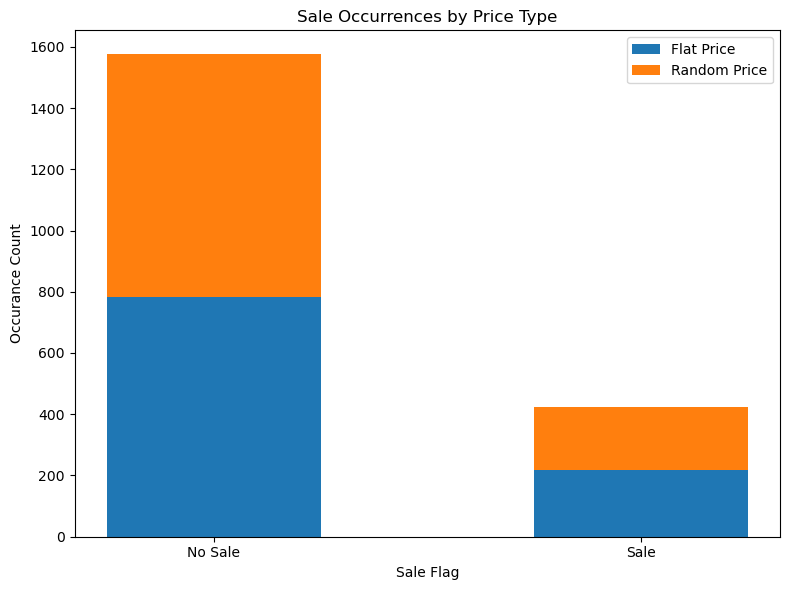

In [164]:
#PriceTest variables
# '0' corresponds to no change of price(flat price) and '1' corresponds to a change of price(random price).
# on the otherhand binary 0 for sale_flag correspond to offer not accepted  and 1 correspond to offer accepted 
#THIS IS ALL REPRESENTED BELOW

#print the unique_category values 
unique_categories = data['PriceTest'].unique()
print(f"Unique categories in 'PriceTest': {unique_categories}")


#After Assigning the unique_categories, the next is to match with our target price_flag
# set flat price and random price variables 
# 'flat_price' contains observations with flat prices,
# 'random_price' contains observations with random prices.
flat_price = data[data['PriceTest'] == 0]
random_price = data[data['PriceTest'] == 1]



# compare flat price and random price occurance in data against Sale_Flag
flat_price_count = flat_price['Sale_Flag'].value_counts()
random_price_count = random_price['Sale_Flag'].value_counts()
print(flat_price_count, random_price_count )



# plt a bar graph
plt.figure(figsize=(8, 6))
bar_width = 0.5
index = ['No Sale', 'Sale']

bar1 = plt.bar(index, flat_price_count, bar_width, label='Flat Price')
bar2 = plt.bar(index, random_price_count, bar_width, label='Random Price', bottom=flat_price_count)

plt.xlabel('Sale Flag')
plt.ylabel('Occurance Count')
plt.title('Sale Occurrences by Price Type')
plt.legend()
plt.tight_layout()
plt.show()

As the graph above indicates, out of the total PriceTest occurance in the data, 782 resulted in no sale for flat price and 793 resulted in no sale for random price
However, out of the total of 425 sales, 218 was based on flat price and 207 was on random or test price

# Compare flat price against data and observe patterns

comparisons of the flat_price against our data
       Claims_Amount  Claims_Count  Purchase_Price    Sale_Flag      Premium  \
count    1000.000000   1000.000000     1000.000000  1000.000000  1000.000000   
mean       65.141950      0.567000      361.519870     0.218000    45.580320   
std       275.642623      2.172149      186.502473     0.413094    11.950053   
min         0.000000      0.000000       44.000000     0.000000    24.720000   
25%         0.000000      0.000000      255.197500     0.000000    37.080000   
50%         0.000000      0.000000      300.000000     0.000000    43.320000   
75%         0.000000      0.000000      406.965000     0.000000    53.640000   
max      3615.280000     28.000000     1999.000000     1.000000   119.040000   

         Plan_Flag          Age  Price_Diff   Plan_Count  PriceTest  \
count  1000.000000  1000.000000      1000.0  1000.000000     1000.0   
mean      0.199000    61.185000         0.0     0.424000        0.0   
std       0.399448 

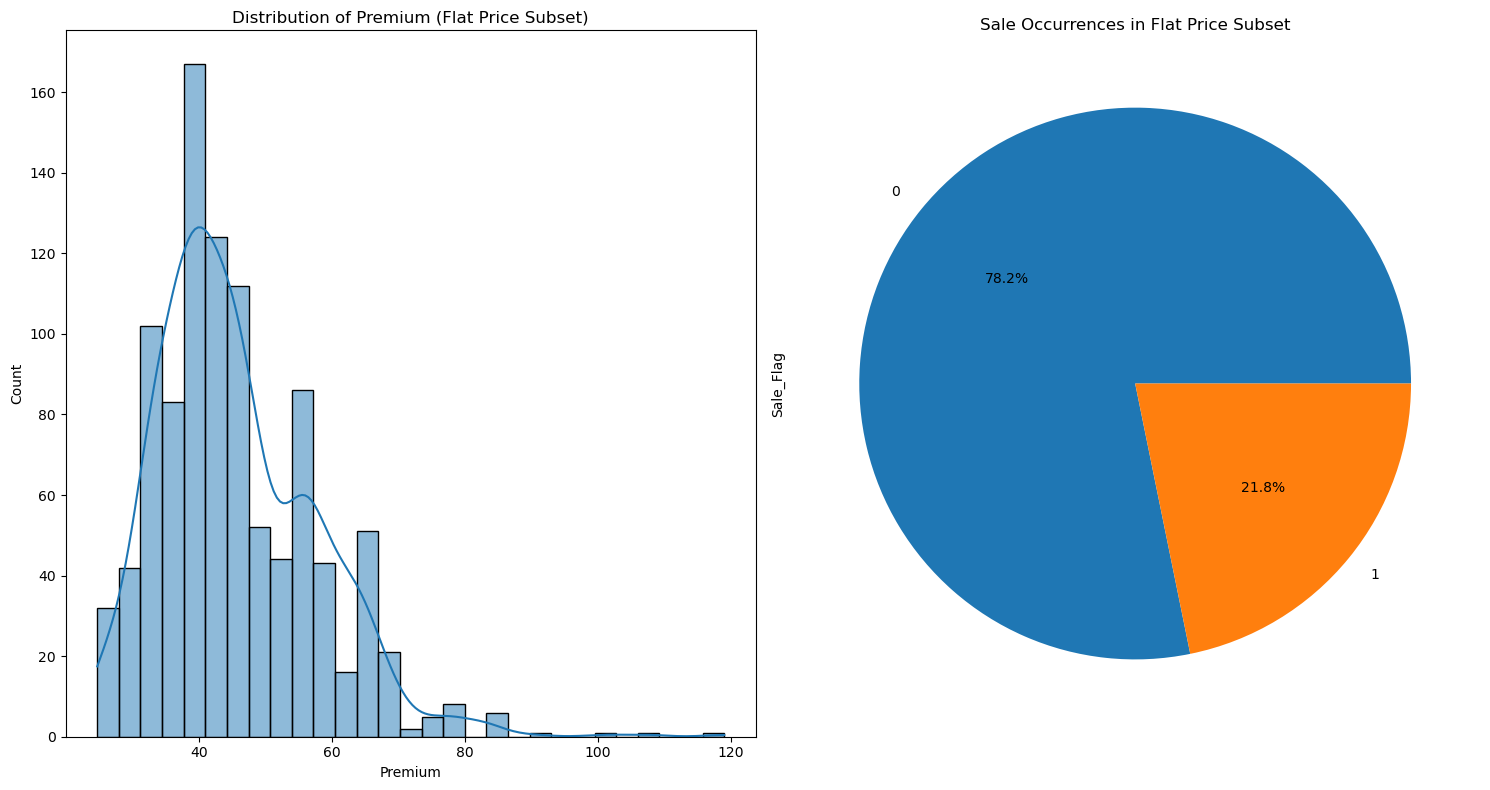

In [165]:
#flat Price analysis to check for some interesting trends
print("comparisons of the flat_price against our data")
print(flat_price.describe())

# Calculate proportion of sale occurrences within flat price subset
flat_price_conversion = flat_price['Sale_Flag'].mean()

#plot a histogram and a subplot to check the distribution of occurances in the purchase_price
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.histplot(flat_price['Premium'], kde=True)
plt.title('Distribution of Premium (Flat Price Subset)')

#represent this trend in pir chart with the percentage distribution
plt.subplot(1, 2, 2)
flat_price['Sale_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sale Occurrences in Flat Price Subset')

plt.tight_layout()
plt.show()



Proportion of sale occurrences within flat price subset: flat_price_conversion which is also our conversion flat price is 21.8% as represented in the graph above

# Compare Random price against data and observe patterns


Random Price Subset Analysis:
--------------------------------------
Descriptive Statistics:
       Claims_Amount  Claims_Count  Purchase_Price    Sale_Flag      Premium  \
count    1000.000000   1000.000000     1000.000000  1000.000000  1000.000000   
mean       63.333990      0.552000      366.000860     0.207000    44.463240   
std       267.998971      2.169332      194.400887     0.405358    13.516979   
min         0.000000      0.000000       55.190000     0.000000    18.000000   
25%         0.000000      0.000000      269.000000     0.000000    35.040000   
50%         0.000000      0.000000      300.000000     0.000000    42.360000   
75%         0.000000      0.000000      411.492500     0.000000    51.360000   
max      4496.550000     31.000000     2999.000000     1.000000   123.600000   

         Plan_Flag          Age   Price_Diff   Plan_Count  PriceTest  \
count  1000.000000  1000.000000  1000.000000  1000.000000     1000.0   
mean      0.171000    46.574000    -0.010

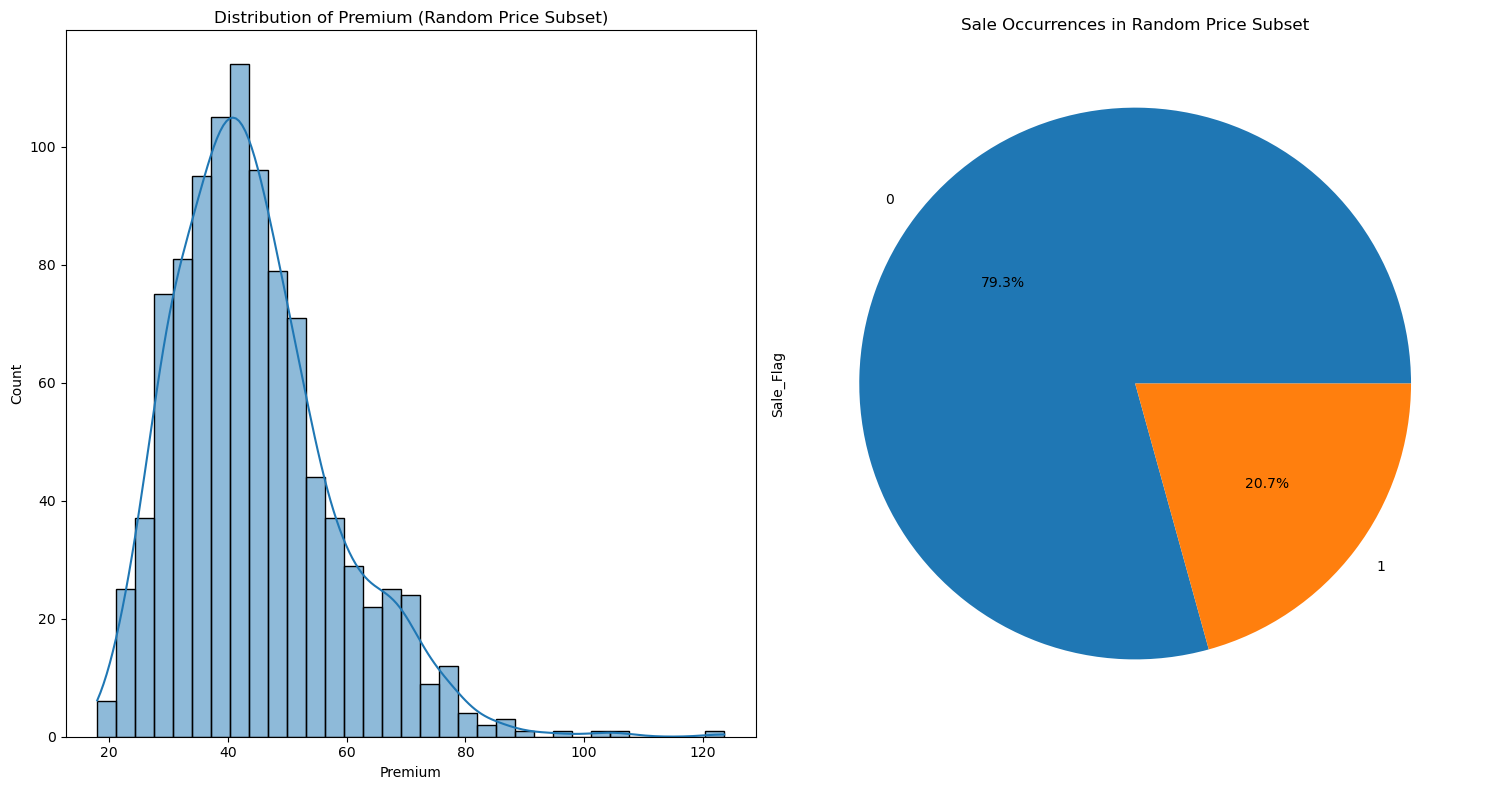

In [166]:
# Analysis for Random Price Subset
print("\nRandom Price Subset Analysis:")
print("--------------------------------------")
print("Descriptive Statistics:")
print(random_price.describe())


# The same is done below for random price analysis
#Calculate proportion of sale occurrences within random price subset

random_price_conversion = random_price['Sale_Flag'].mean()

# Visualization for Random Price Subset
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.histplot(random_price['Premium'], kde=True)
plt.title('Distribution of Premium (Random Price Subset)')

plt.subplot(1, 2, 2)
random_price['Sale_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sale Occurrences in Random Price Subset')

plt.tight_layout()
plt.show()



Proportion of sale occurrences within random price subset: random_price_conversion which is also our conversion random price is 20.7%. 




# Calculate price elasticity using the formula given 

In [167]:
# Calculate average premium for the flat price and random price
# flat_price = data[data['PriceTest'] == 0] 
# random_price = data[data['PriceTest'] == 1]

flat_price_avg_premium = flat_price['Premium'].mean()
random_price_avg_premium = random_price['Premium'].mean()

#Calculate Price Elasticity
#price elasticity of <1 indicates inelastic
#price elasticity of >1 indicates elasticity
price_elasticity = ((random_price_conversion - flat_price_conversion) / random_price_conversion) / ((random_price_avg_premium - flat_price_avg_premium) / flat_price_avg_premium)
if price_elasticity > 1:
    print(f"Price Elasticity is  value {price_elasticity} indicates elasticity")
else:
    print(f"Price Elasticity is {price_elasticity} indicates inelasticity")

Price Elasticity is  value 2.1682803458084035 indicates elasticity


The magnitude of 2.1682803458084035 indicates that for every 1% increase in price, there would be a 2.168% decrease in conversion rate and vice versa

With a value greater than 1, it indicates elasticity. Meaning changes in price are relatively sensitive to changes in conversion rate, and vice versa. 

In other words, small changes in price could lead to relatively larger changes in the conversion rate.

This could also imply that consumers are price-sensitive, and adjusting the price could have a significant impact on the conversion rate suggesting, there is room for optimization in pricing strategy


# Model

QUESTION: Build how many demand models you want and report on the metric(s) of your choice. The model should predict the likelihood of the customer accepting an offer.


In [168]:

#split the data into x and y variables where x is data without our target(sale_flag) and y variable is only the target(sale_flag)
x, y = data.drop("Sale_Flag", axis=1), data["Sale_Flag"]
    
#Also, data is split into training and testing data
#define x, y train and test variables and evaluate the model by using 20% of data and random_state of 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

#transform the test data
x_test_scaled = scaler.transform(x_test)


In [169]:
# Initialize models where we use both logistic regression and RandomForestClassifier
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier() 

#Train models
logistic_regression.fit(x_train_scaled, y_train)
random_forest.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [170]:
# Predictions
y_prediction_rf = random_forest.predict(x_test_scaled)
y_prediction_lr = logistic_regression.predict(x_test_scaled)

# Model Evaluation
    
   Things to look out for in the model evaluation are;
   - Precision
   - Recall
   - F1-score
   - Accuracy
   - Macro Avg and Weighted Avg
   

In [171]:
# Evaluate the model

#for Random forest Metrics
print("Random Forest Metrics:")
Random_Forest_Metrics = (classification_report(y_test, y_prediction_rf))
print(Random_Forest_Metrics)

#for Logistic regression metrics
print("Logistic Regression Metrics:")
Logistic_Regression_Metrics = (classification_report(y_test, y_prediction_lr))
print(Logistic_Regression_Metrics)

Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       318
           1       0.58      0.30      0.40        82

    accuracy                           0.81       400
   macro avg       0.71      0.62      0.64       400
weighted avg       0.79      0.81      0.79       400

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       318
           1       0.69      0.22      0.33        82

    accuracy                           0.82       400
   macro avg       0.76      0.60      0.61       400
weighted avg       0.80      0.82      0.78       400



# Observation

Random Forest Matrix:

The metrics suggest that the model performs very well predicting instances where customers did not accept the offer(no sale_flag) with high precision(84%), recall(95%) and f1-score(89%). However, for predictions of instances where customer accepted an offer(sale_flag) is 61% precision, 30% recall and 41% f1-score. The model accuracy is above 80%

Logistic Regression Matrix
The metrics suggest that the model performs very well predicting instances where customers did not accept the offer(no sale_flag) with high precision(83%), recall(97%) and f1-score(90%). However, for predictions of instances where customer accepted an offer(sale_flag) is 69% precision, 22% recall and 33% f1-score. The model accuracy is above 80% for both metrix. 

This information can be particularly useful when looking at ways to improve on the model in the future.

From this observation the likelihood of a customer accepting an offer is high with slight change in price as the price elasticity is above 1 and the accuracy of the model is above 80%. It can also be interpreted as a slight reduction in price could increase sales levels.

Quesion: Hyper parameter optimisation may take a lot of time to complete, this is not a re-quirement, but I’d like your comments on how you would approach this

# How to approach a Hyperparameter optimization

To carry out a Hyperparameter optimization in predicting customer accepting an offer(sale_flag) or not, it will involve tuning parameters the model to improve its performance by following these steps.

    1.	Defining the hyperparameters by selecting the regression model or random forest classifier to optimize.
    2.	Choose an optimization strategy by deciding on optimization strategy to use example, grid search
    3.	Split Data into two subsets including training, validating, and testing data where the training data is   used  to train the model, the validation set used to tune the hyperparameters and the testing set is used to evaluate the final model performance
    4.	Choose performance Metrix to optimize during the hyperparameter tuning by checking for precision, recall, accuracy etc
    5.	Perform Hyperparameter optimization by carrying out a grid search or random search
    6.	Cross-validate the finding 
    7.	Evaluate the model for performance and efficiency 

Question: Engineer at least 1 new feature to improve the demand model. Assess whether the new fea-ture(s) should be included.

# Engineer at least 1 new feature to improve the demand model
 
 
 The first thing I considered in this senario is to identify which new features could improve the model. From our correlation metrix, I think there is an intesting correlation between premium and category therefore I will focus on them.

In [172]:
# Calculate the average premium price within each category and reset the index
avg_premium_by_category = data.groupby("Category")["Premium"].mean().reset_index()
avg_premium_by_category.columns = ["Category", "Avg_Premium"]

# Merge the average premium price back to the data
data_with_avg_premium = pd.merge(data, avg_premium_by_category, on="Category", how="left")

# calculate the cost difference 
data_with_avg_premium["Price_Diff_From_Avg"] = data_with_avg_premium["Premium"] - data_with_avg_premium["Avg_Premium"]

# Assess the importance of the new feature by importing the mutual_info_classic from sklearn
from sklearn.feature_selection import mutual_info_classif

# Select relevant features and target variable and run the model between the x_new and y_new
x_new = data_with_avg_premium[["Claims_Amount", "Claims_Count", "Purchase_Price", "Age", "Plan_Flag"]]
y_new = data_with_avg_premium["Sale_Flag"]

# Calculate mutual information between features and target variable
feature_importance = mutual_info_classif(x_new, y_new, discrete_features=[False, False, False, False, False])

# Display feature importance scores
feature_importance_df = pd.DataFrame({"Feature": x_new.columns, "Importance": feature_importance})
print(feature_importance_df)

          Feature  Importance
0   Claims_Amount    0.022421
1    Claims_Count    0.021938
2  Purchase_Price    0.011690
3             Age    0.025146
4       Plan_Flag    0.033850


# Demand model observation
The outcome indicates Plan Flag have the highest importance with a value of 0.033850 indicating relatively strong impact on predicting the sale demand.This mean that customers having existing plans are more likely to accept an offer.

This is followed by the 0.025146 for Age, claims amount being 3rd on the list with a value of 0.022421, claim amount of 0.021938 and the least important is purchase price difference of 0.011690.

#  Question: For the top 5 features, please provide a partial independence plot. What’s the most important and why (qualitatively speaking)?



In [173]:

# Assigning x and y are the data and split data into x_train and y_train
x = data_with_avg_premium[["Claims_Amount", "Claims_Count", "Purchase_Price", "Age", "Plan_Flag"]]
y = data_with_avg_premium["Sale_Flag"]


# Split the data into training and testing sets. 20% of data is used for the training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

#transform the test data
x_test_scaled = scaler.transform(x_test)

# Initialize RandomForestClassifier model
random_forest = RandomForestClassifier()
random_forest.fit(x_train_scaled, y_train)


RandomForestClassifier()

In [174]:
y_prediction_rf = random_forest.predict(x_test_scaled)

#for Random forest Metrics
print("Random Forest Metrics:")
Random_Forest_Metrics = (classification_report(y_test, y_prediction_rf))
print(Random_Forest_Metrics)

Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       318
           1       0.48      0.34      0.40        82

    accuracy                           0.79       400
   macro avg       0.66      0.62      0.64       400
weighted avg       0.77      0.79      0.78       400



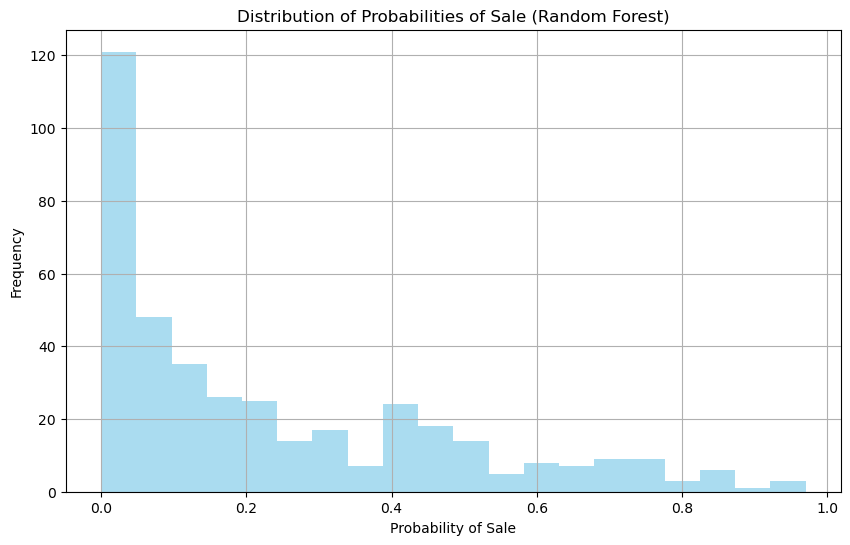

In [175]:

# Predict probabilities for the Random Forest model
y_prediction_rf = random_forest.predict_proba(x_test_scaled)[:, 1]

# Plot histogram of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_prediction_rf, bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Probability of Sale')
plt.ylabel('Frequency')
plt.title('Distribution of Probabilities of Sale (Random Forest)')
plt.grid(True)
plt.show()


# Observation

# Random Forest Metrics:
The metrics suggest that the model performs very well predicting instances where customers did not accept the offer(no sale_flag) with high precision(84%), recall(91%) and f1-score(87%). However, for predictions of instances where customer accepted an offer(sale_flag) is 48% precision,34% recall and 40% f1-score. The model accuracy is 79%

From this observation the likelihood of a customer accepting an offer is high with slight change in price as the price elasticity is above 1 and the accuracy of the model is above 79%. It can also be interpreted as a slight reduction in price could increase sales levels.

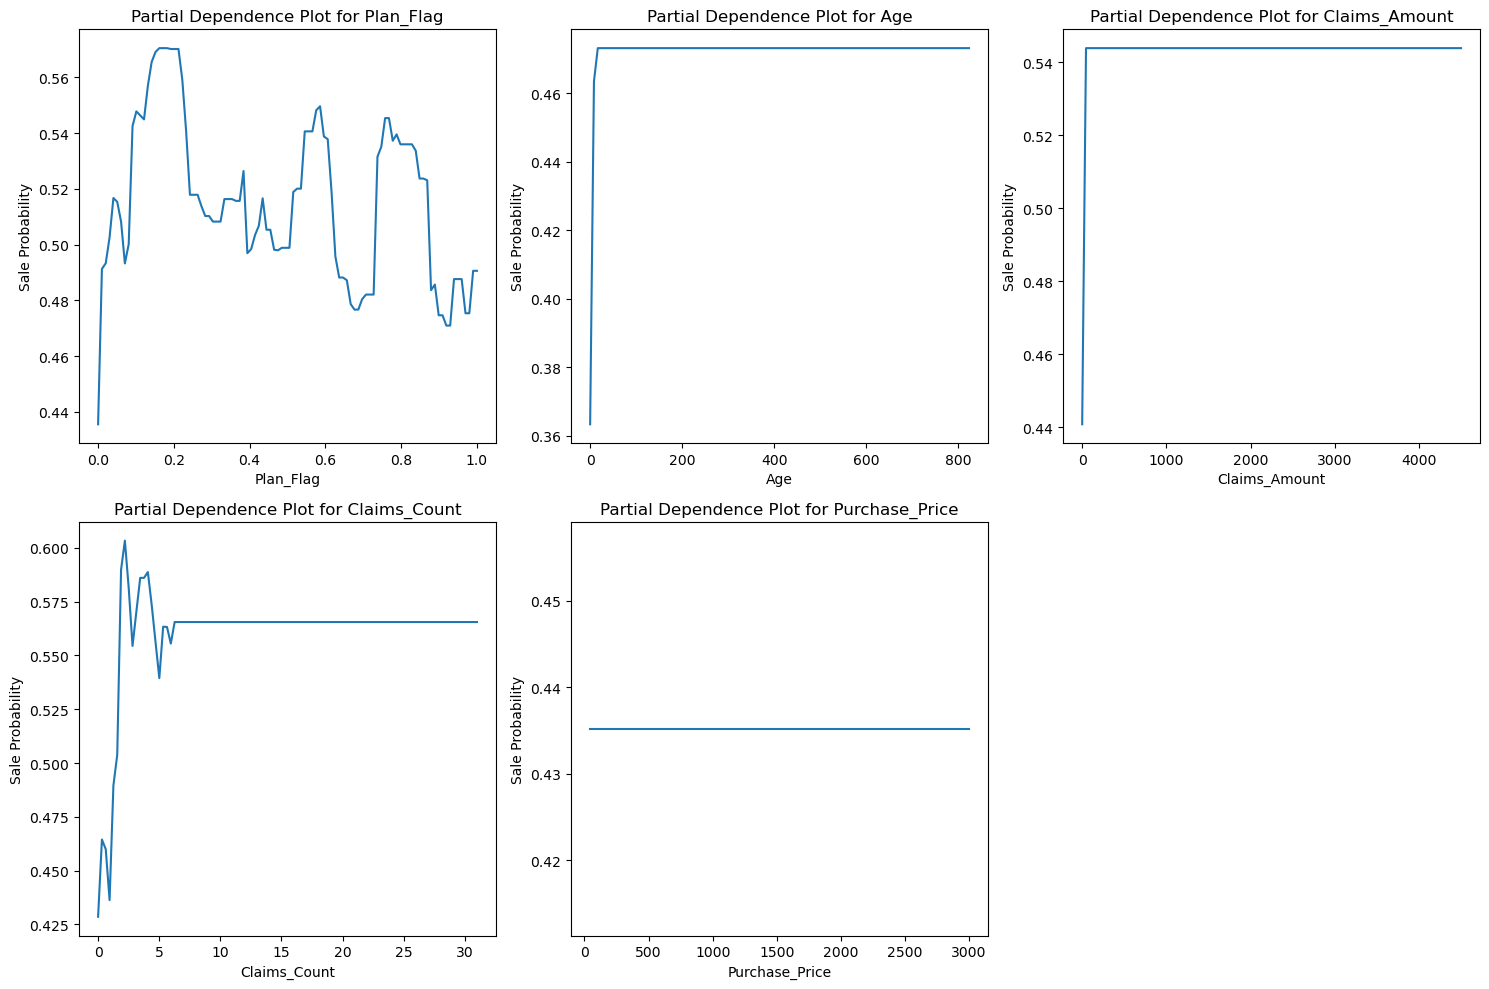

In [176]:

# Select top 5 features
top_features = feature_importance_df.nlargest(5, 'Importance')['Feature'].tolist()

# Define function to calculate partial dependence
def calculate_pdp(feature):
    feature_values = np.linspace(data_with_avg_premium[feature].min(), x[feature].max(), 100)
    pdp_values = []

    for value in feature_values:
        data_copy = x.copy()
        data_copy[feature] = value
        pdp_values.append(random_forest.predict_proba(data_copy[top_features])[:, 1].mean())

    return feature_values, pdp_values

# Plot partial dependence plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    pdp_values = calculate_pdp(feature)
    plt.plot(pdp_values[0], pdp_values[1])
    plt.xlabel(feature)
    plt.ylabel('Sale Probability')
    plt.title(f'Partial Dependence Plot for {feature}')

plt.tight_layout()
plt.show()

#This is to avoid warning/error shown in report
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


# An impact of a  10% increase in flat price on the model

In [177]:
# Calculate the new premium prise with a 10% increase
data["ten_percent_Premium"] = data['Premium'] * 1.10


# #split the data into x and y
x, y = data.drop("Sale_Flag", axis=1), data["Sale_Flag"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

#transform the test data
x_test_scaled = scaler.transform(x_test)

# Initialize RandomForestClassifier model
random_forest = RandomForestClassifier()
random_forest.fit(x_train_scaled, y_train)



# Initialize models where we use both logistic regression and RandomForestClassifier
random_forest = RandomForestClassifier() 

#Train models
random_forest.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [178]:
# Predictions
y_predictions_rf = random_forest.predict(x_test_scaled)

#for Random forest Metrics
print("Random Forest Metrics:")
Random_Forest_Metrics = (classification_report(y_test, y_predictions_rf))
print(Random_Forest_Metrics)



Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       318
           1       0.59      0.27      0.37        82

    accuracy                           0.81       400
   macro avg       0.71      0.61      0.63       400
weighted avg       0.79      0.81      0.78       400



# OBSERVATION
The probability of demand with a 10% increase in premium indicates almost a slight higher conversion outcome where; For the prediction instances  for non_sale dropped by 1% from previous(84%), precision, 95% recall percentage, 89% f1-score with an accuracy of 81%

on the sales instances, the precision is 59% which is slightly higher, recall is 27% and f1-score of 37% wiht the same 82% accuracy. This observation indicates that 10% change in price can influence change in customer decision to accept an offer.


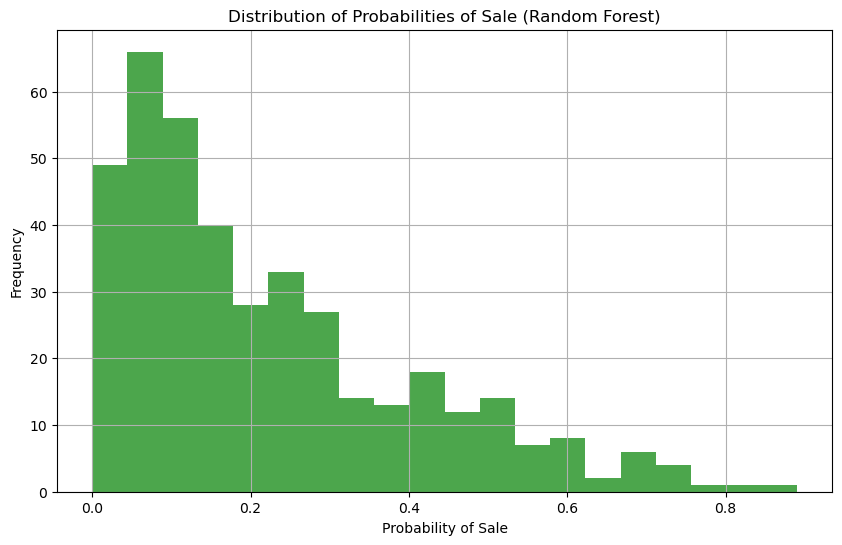

In [179]:


# Predict probabilities for the Random Forest model
y_probabilities_rf = random_forest.predict_proba(x_test_scaled)[:, 1]

# Plot histogram of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_probabilities_rf, bins=20, color='green', alpha=0.7)
plt.xlabel('Probability of Sale')
plt.ylabel('Frequency')
plt.title('Distribution of Probabilities of Sale (Random Forest)')
plt.grid(True)
plt.show()


# OBSERVATION
The graphs above shows the prediction of the two senarios which predicts customer accepting an offer with flat price and an increase of 10%. The calculation shows a slightly higher percentage chance of customer accpeting an offer of an increase of 10% with the accuracy rate of almost 80%. This could also mean a reduction of 10% in price can influence customer accepting an offer.